In [44]:
import pandas  as pd
import seaborn as sns
import plotly.express    as px
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [45]:
raw_data = pd.read_csv('crimecases.csv')
raw_data.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [46]:
raw_survey_df = raw_data.pivot_table(index=['Country','Gender','Demographics Question','Demographics Response'],columns=['Question'], values=['Value'])
raw_survey_df

Value  \
Question                                                              ... for at least one specific reason   
Country     Gender Demographics Question Demographics Response                                               
Afghanistan F      Age                   15-24                                                        80.1   
                                         25-34                                                        81.5   
                                         35-49                                                        79.0   
                   Education             Higher                                                       61.1   
                                         No education                                                 81.0   
...                                                                                                    ...   
Zimbabwe    M      Marital status        Married or living together                                   24.6   
                                         Never married                                                42.4   
                                         Widowed, divorced, separated                                 28.8   
                   Residence             Rural                                                        37.2   
                                         Urban                                                        25.0   

                                                                                                  \
Question                                                              ... if she argues with him   
Country     Gender Demographics Question Demographics Response                                     
Afghanistan F      Age                   15-24                                              57.5   
                                         25-34                                              60.0   
                                         35-49                                              59.8   
                   Education             Higher                                             37.7   
                                         No education                                       60.2   
...                                                                                          ...   
Zimbabwe    M      Marital status        Married or living together                         10.2   
                                         Never married                                      18.2   
                                         Widowed, divorced, separated                       12.4   
                   Residence             Rural                                              16.8   
                                         Urban                                               8.8   

                                                                                                 \
Question                                                              ... if she burns the food   
Country     Gender Demographics Question Demographics Response                                    
Afghanistan F      Age                   15-24                                             17.3   
                                         25-34                                             18.2   
                                         35-49                                             18.8   
                   Education             Higher                                            10.1   
                                         No education                                      19.1   
...                                                                                         ...   
Zimbabwe    M      Marital status        Married or living together                         3.1   
                                         Never married                                      9.3   
                                         Widowed, divorced, separated 

In [47]:
survey_df = raw_survey_df.T.reset_index(drop=True).T.reset_index()

# Rename columns
survey_df.columns = ['country',
                     'gender',
                     'demographics_question',
                     'demographics_response',
                     'violence_any_reason',
                     'violence_argue',
                     'violence_food',
                     'violence_goingout',
                     'violence_neglect',
                     'violence_sex',
                    ]

In [48]:
survey_df

,country,gender,demographics_question,demographics_response,violence_any_reason,violence_argue,violence_food,violence_goingout,violence_neglect,violence_sex
0,Afghanistan,F,Age,15-24,80.1,57.5,17.3,67.7,46.5,32.1
1,Afghanistan,F,Age,25-34,81.5,60.0,18.2,68.5,50.2,34.3
2,Afghanistan,F,Age,35-49,79.0,59.8,18.8,64.7,48.1,33.5
3,Afghanistan,F,Education,Higher,61.1,37.7,10.1,41.1,33.4,10.8
4,Afghanistan,F,Education,No education,81.0,60.2,19.1,68.4,48.9,34.2
...,...,...,...,...,...,...,...,...,...,...
1884,Zimbabwe,M,Marital status,Married or living together,24.6,10.2,3.1,14.2,13.8,4.4
1885,Zimbabwe,M,Marital status,Never married,42.4,18.2,9.3,21.8,23.2,7.8
1886,Zimbabwe,M,Marital status,"Widowed, divorced, separated",28.8,12.4,3.3,16.3,18.3,4.7
1887,Zimbabwe,M,Residence,Rural,37.2,16.8,7.9,21.0,20.1,7.2


In [49]:
fig = px.box(survey_df.query("demographics_question == 'Age'").sort_values('violence_any_reason',ascending=False),
            x      = 'country',
            y      = 'violence_any_reason',
            color  = 'gender',
            title  = '% of Respondents that agree with violence for any surveyed reason across Country and Gender',
            color_discrete_sequence = ['#4a00ba','#00ba82'],
            height = 650
        )

fig.update_xaxes(title='Country')
fig.update_yaxes(title='% Agrees: Violence is justified for any surveyed reason')
fig.show()

In [50]:
fig = px.bar(survey_df.query("demographics_question == 'Age'").sort_values('violence_any_reason',ascending=False),
            x      = 'country',
            y      = 'violence_any_reason',
            color = 'demographics_response',
            title  = '% of Violence for any surveyed reason across Country and Age Group ',
            height = 650
        )

fig.update_xaxes(title='Country')
fig.update_yaxes(title='% Agrees: Violence is justified for any surveyed reason')
fig.show()

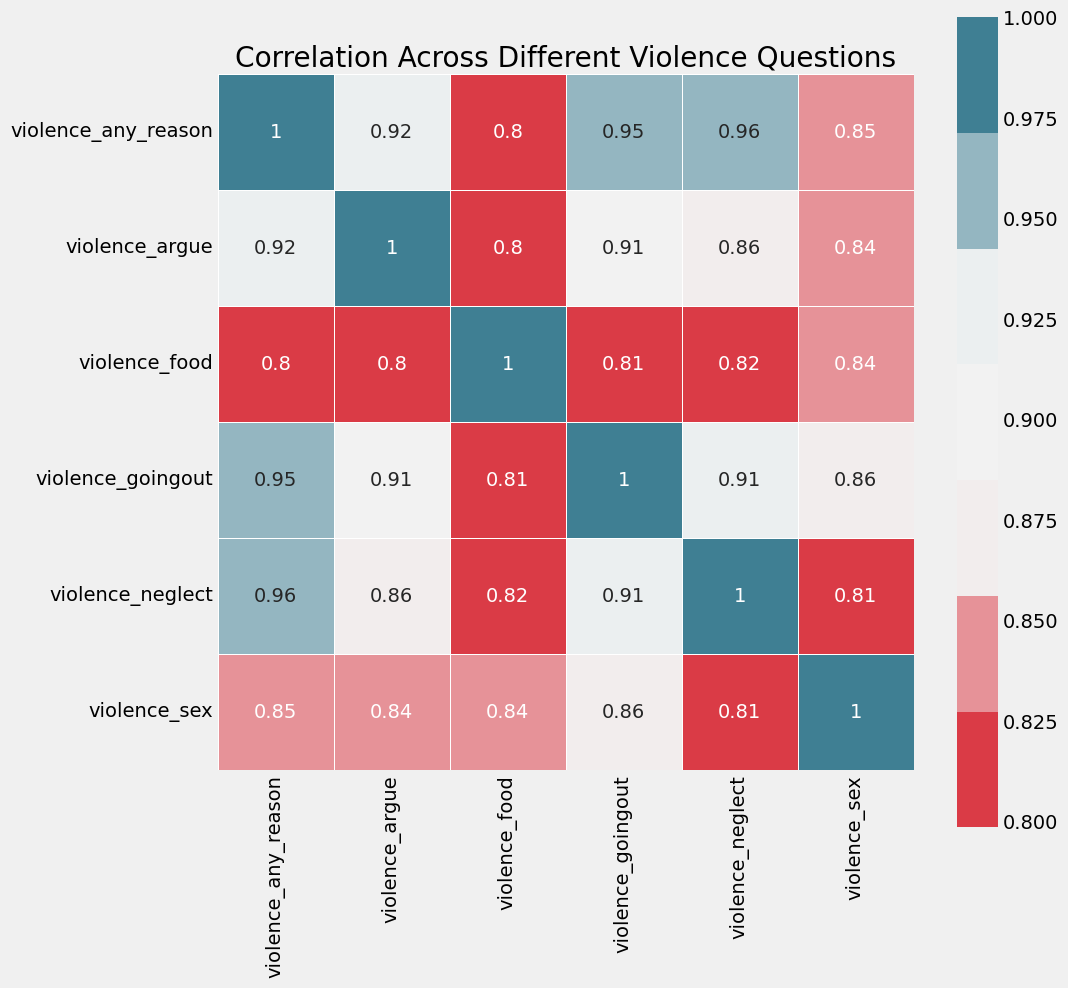

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(survey_df.iloc[:,4:].corr(),
            square=True,
            linewidths=.5,
            cmap=sns.diverging_palette(10, 220, sep=80, n=7),
            annot=True,
           )
plt.title('Correlation Across Different Violence Questions')
plt.show()

In [52]:
print('Dataset contains data from {} countries'.format(raw_data.Country.nunique()))

Dataset contains data from 70 countries


In [53]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [54]:
columns = raw_data.columns
for column in columns:
    print(f"{column} : {raw_data[column].nunique()}")

RecordID : 420
Country : 70
Gender : 2
Demographics Question : 5
Demographics Response : 15
Question : 6
Survey Year : 18
Value : 757


In [56]:
demographics_df = raw_data.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "max", "min", "mean"]).reset_index() # Changed raw_datadf to raw_data
demographics_df.columns = ["Question", "Response", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per demographic group")
demographics_df.sort_values(["Question", "Median"])

Violence % median, min, max, and mean per demographic group


,Question,Response,Median,Max,Min,Mean
2,Age,35-49,14.15,81.0,0.2,19.336412
1,Age,25-34,14.45,81.5,0.1,19.703562
0,Age,15-24,17.50,80.1,0.1,21.084169
3,Education,Higher,4.20,74.6,0.0,8.898670
6,Education,Secondary,13.05,76.7,0.2,17.378892
5,Education,Primary,18.40,80.5,0.1,22.819093
4,Education,No education,21.55,82.0,0.0,25.403125
9,Employment,Unemployed,14.55,80.1,0.0,19.539710
7,Employment,Employed for cash,14.85,81.5,0.1,19.553804
8,Employment,Employed for kind,20.15,86.9,0.3,24.445541


In [57]:
question_df = raw_data.groupby(["Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index() # Changed raw_data_df to raw_data
question_df.columns = ["Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per question asked")
question_df.sort_values(["Median"])

Violence % median, min, max, and mean per question asked


,Question,Median,Max,Min,Mean
2,... if she burns the food,6.4,56.7,0.0,9.203445
5,... if she refuses to have sex with him,9.0,68.7,0.0,13.209613
1,... if she argues with him,15.7,76.5,0.0,18.983652
3,... if she goes out without telling him,16.4,77.0,0.0,20.046321
4,... if she neglects the children,20.8,75.6,0.0,23.461249
0,... for at least one specific reason,31.0,86.9,0.0,33.217152


In [58]:
# Assuming your data is in a CSV file named 'your_data.csv'
import pandas as pd

# Load your data into a DataFrame called data_df
data_df = pd.read_csv('violence_data.csv.zip')

# Now you can perform the groupby operation
demoq_df = data_df.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
demoq_df.columns = ["Demographics Question", "Demographics Response", "Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per demographic group and question asked")
demoq_df = demoq_df.sort_values(["Demographics Question", "Demographics Response", "Median"])
demoq_df.head()

Violence % median, min, max, and mean per demographic group and question asked


,Demographics Question,Demographics Response,Question,Median,Max,Min,Mean
2,Age,15-24,... if she burns the food,8.50,47.7,0.1,10.098387
5,Age,15-24,... if she refuses to have sex with him,10.05,59.4,0.3,13.404762
3,Age,15-24,... if she goes out without telling him,18.40,67.7,0.2,21.026563
1,Age,15-24,... if she argues with him,18.65,65.5,0.5,20.304032
4,Age,15-24,... if she neglects the children,23.20,61.4,1.9,25.306250


In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def show_answers_per_demographic_question(question, aggregate="Median", layout_mode="Single"):
    font_size = 8
    title_font_size = 12
    if layout_mode == "Single":
        fig = go.Figure()
        font_size = 10
    else:
        fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

    sel_df = demoq_df.loc[demoq_df["Demographics Question"]==question]
    answers = list(sel_df["Demographics Response"].unique())
    count = 0
    for answer in answers:
        subsel_df = sel_df.loc[sel_df["Demographics Response"] == answer]
        if layout_mode == "Single":
            fig.add_trace(go.Scatterpolar(name=answer, r=subsel_df[aggregate], theta=subsel_df['Question']))
        else:
            fig.add_trace(go.Scatterpolar(name=answer, r=subsel_df[aggregate], theta=subsel_df['Question']), count%2 + 1, int(count/2+1))
        count = count + 1
    fig.update_traces(fill='toself')
    fig.update_polars(bgcolor='white')
    fig.update_polars(angularaxis_linecolor='darkgrey')
    fig.update_polars(angularaxis_gridcolor='darkgrey')
    fig.update_polars(radialaxis_gridcolor='darkgrey')
    fig.update_polars(radialaxis_linecolor='darkgrey')
    fig.update_layout(title='Demografics Question: '+ question + ' | Statistics: ' + aggregate,font=dict(family="Courier New, monospace",size=title_font_size))
    fig.show()

In [60]:
show_answers_per_demographic_question("Age")


In [61]:
show_answers_per_demographic_question("Age", aggregate="Max")

In [ ]:
show_answers_per_demographic_question("Education")

In [ ]:
show_answers_per_demographic_question("Education", aggregate="Max")

In [ ]:
show_answers_per_demographic_question("Employment")


In [ ]:
show_answers_per_demographic_question("Employment", aggregate="Max")

In [ ]:
show_answers_per_demographic_question("Marital status")


In [ ]:
show_answers_per_demographic_question("Marital status", aggregate="Max")

In [ ]:
show_answers_per_demographic_question("Residence")

In [ ]:
show_answers_per_demographic_question("Residence", aggregate="Max")